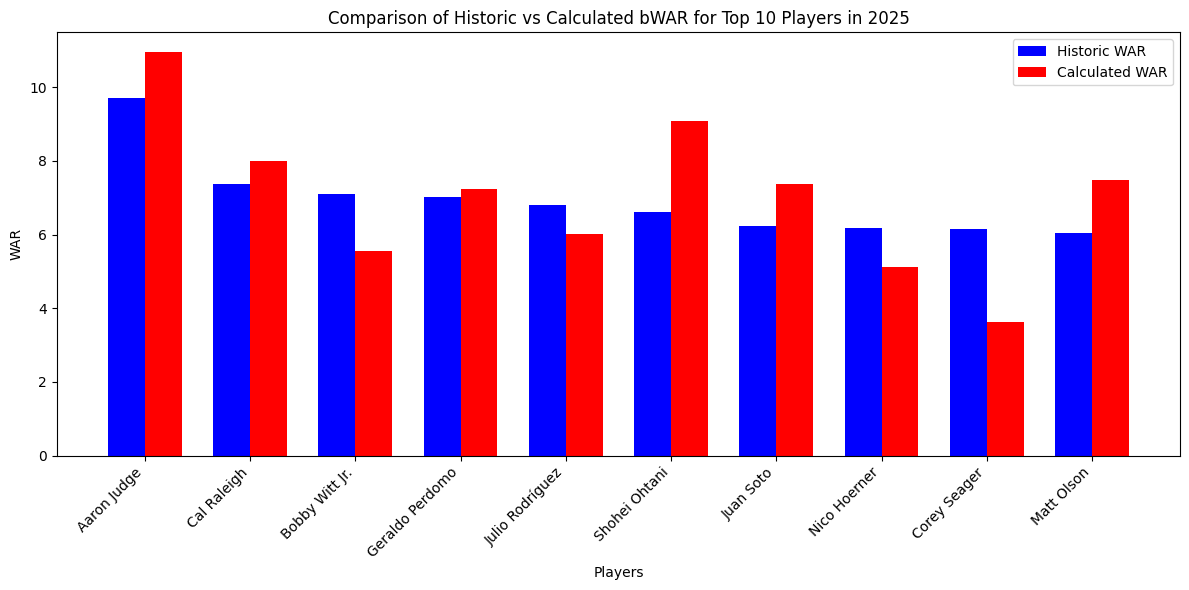

In [5]:
import pandas as pd

war_historic = pd.read_csv("batting_war.csv")
war_calculated = pd.read_csv("war_2025.csv")

# Filter historic data for 2025 only
war_historic_2025 = war_historic[war_historic['year_ID'] == 2025]

# Drop rows with missing WAR values in calculated data
war_calculated = war_calculated.dropna(subset=['WAR'])

# Create a bar chart comparing the top 10 players by real bWAR in 2025 with the same top 10 players by calculated bWAR in 2025
import matplotlib.pyplot as plt

top10_historic = war_historic_2025.sort_values(by="WAR", ascending=False).head(10)

# Merge to get matching calculated WAR values, preserving the order of top10_historic
top10_comparison = top10_historic.merge(
    war_calculated, 
    left_on='player_ID', 
    right_on='playerID', 
    how='left',
    suffixes=('_historic', '_calculated')
)

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(top10_comparison))
plt.bar(index, top10_comparison['WAR_historic'], bar_width, label='Historic WAR', color='b')
plt.bar([i + bar_width for i in index], top10_comparison['WAR_calculated'], bar_width, label='Calculated WAR', color='r')
plt.xlabel('Players')
plt.ylabel('WAR')
plt.title('Comparison of Historic vs Calculated bWAR for Top 10 Players in 2025')
plt.xticks([i + bar_width / 2 for i in index], top10_comparison['name_common'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()